# EDA: Time-Series Graphs

## Imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Load in Data 

In [20]:
covid_data = []
folder_name = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
covid_data.append(
    folder_name + 'time_series_covid19_confirmed_US.csv'
)
covid_data.append(
    folder_name + 'time_series_covid19_deaths_US.csv'
)

df_covid_conf = pd.read_csv(
    covid_data[0]
)
df_covid_dead = pd.read_csv(
    covid_data[1]
)

two_letter_abbreviation = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Federated States of Micronesia': 'FM',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Marshall Islands': 'MH',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands': 'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

## Clean and Reformat Dataframe

In [21]:
us_conf = (
    (
        (
            df_covid_conf[df_covid_conf.FIPS > 1000]
        )[df_covid_conf.FIPS < 80000]
    )
)[df_covid_dead.Population > 0]
us_dead = (
    (
        (
            df_covid_dead[df_covid_dead.FIPS > 1000]
        )[df_covid_dead.FIPS < 80000]
    )[df_covid_dead.Population > 0]
)

us_conf['Province_State'] = us_conf.Province_State.map(two_letter_abbreviation)
us_dead['Province_State'] = us_dead.Province_State.map(two_letter_abbreviation)

<ipython-input-21-020eaf043c06>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (
<ipython-input-21-020eaf043c06>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  us_conf = (
<ipython-input-21-020eaf043c06>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (
<ipython-input-21-020eaf043c06>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (


In [22]:
us_conf.T.drop(['iso2','iso3','FIPS','UID','code3', 'Country_Region', 'Lat','Long_','Combined_Key']).T

,Admin2,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21
0,Autauga,AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,6,6,6,6,

In [26]:
us_conf.T.drop(['iso2','iso3','FIPS', 'UID', 'code3','Country_Region', 'Lat','Long_','Combined_Key']
).T.rename(columns={'Province_State': 'State', 'Admin2': 'County'})

,County,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21
0,Autauga,AL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,6,6,6,6,8,8,10,12

In [27]:
us_conf.T.drop(['iso2', 'iso3', 'FIPS', 'UID', 'code3', 'Country_Region',  'Lat', 'Long_', 'Combined_Key']
).T.rename(columns={'Province_State': 'State', 'Admin2': 'County'}).set_index(['State', 'County'])

1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20  \
State County                                                               
AL    Autauga          0       0       0       0       0       0       0   
      Baldwin          0       0       0       0       0       0       0   
      Barbour          0       0       0       0       0       0       0   
      Bibb             0       0       0       0       0       0       0   
      Blount           0       0       0       0       0       0       0   
...                  ...     ...     ...     ...     ...     ...     ...   
WY    Sweetwater       0       0       0       0       0       0       0   
      Teton            0       0       0       0       0       0       0   
      Uinta            0       0       0       0       0       0       0   
      Washakie         0       0       0       0       0       0       0   
      Weston           0       0       0       0       0       0       0   

                 1/29/20 1/30/20 1/31/20 2/1/20 2/2/20 2/3/20 2/4/20 2/5/20  \
State County                                                                  
AL    Autauga          0       0       0      0      0      0      0      0   
      Baldwin          0       0       0      0      0      0      0      0   
      Barbour          0       0       0      0      0      0      0      0   
      Bibb             0       0       0      0      0      0      0      0   
      Blount           0       0       0      0      0      0      0      0   
...                  ...     ...     ...    ...    ...    ...    ...    ...   
WY    Sweetwater       0       0       0      0      0      0      0      0   
      Teton            0       0       0      0      0      0      0      0   
      Uinta            0       0       0      0      0      0      0      0   
      Washakie         0       0       0      0      0      0      0      0   
      Weston           0       0       0      0      0      0      0      0   

                 2/6/20 2/7/20 2/8/20 2/9/20 2/10/20 2/11/20 2/12/20 2/13/20  \
State County                                                                   
AL    Autauga         0      0      0      0       0       0       0       0   
      Baldwin         0      0      0      0       0       0       0       0   
      Barbour         0      0      0      0       0       0       0       0   
      Bibb            0      0      0      0       0       0       0       0   
      Blount          0      0      0      0       0       0       0       0   
...                 ...    ...    ...    ...     ...     ...     ...     ...   
WY    Sweetwater      0      0      0      0       0       0       0       0   
      Teton           0      0      0      0       0       0       0       0   
      Uinta           0      0      0      0       0       0       0       0   
      Washakie        0      0      0      0       0       0       0       0   
      Weston          0      0      0      0       0       0       0       0   

                 2/14/20 2/15/20 2/16/20 2/17/20 2/18/20 2/19/20 2/20/20  \
State County                                                               
AL    Autauga          0       0       0       0       0       0       0   
      Baldwin          0       0       0       0       0       0       0   
      Barbour          0       0       0       0       0       0       0   
      Bibb             0       0       0       0       0       0       0   
      Blount           0       0       0       0       0       0       0   
...                  ...     ...     ...     ...     ...     ...     ...   
WY    Sweetwater       0       0       0       0       0       0       0   
      Teton            0       0       0       0       0       0       0   
      Uinta            0       0       0       0       0       0       0   
      Washakie         0       0       0       0       0       0       0   
      Weston           0       0       0       

In [28]:
df_conf_ts = (
    (
        (
            us_conf
        ).T
     ).drop(
         ['iso2', 'iso3', 'FIPS', 'UID', 'code3', 'Country_Region', 'Lat', 'Long_', 'Combined_Key']
         )
).T.rename(
    columns={
        'Province_State': 'State',
        'Admin2': 'County'
    }
).set_index(['State', 'County'])

df_dead_ts = (
    (
        (
            us_dead
        ).T
     ).drop(
         ['iso2', 'iso3', 'FIPS', 'UID', 'code3', 'Country_Region', 'Lat', 'Long_', 'Combined_Key',
          'Population', ]
         )
).T.rename(
    columns={
        'Province_State': 'State',
        'Admin2': 'County'
    }
).set_index(['State', 'County'])

df_stat = pd.DataFrame(
    {
        'State': us_dead['Province_State'],
        'FIPS': us_dead['FIPS'],
        'County': us_dead['Admin2'],
        'Population': us_dead['Population'],
    }
).set_index(['State', 'County'])

## Time-Series Plots 

The idea for the section below was to experiment with a variety of time-series plots at different levels of granularity.  When attempting future projects like this, I might try attaching these graphs to streaming datasources and putting them into a single dashboard app.

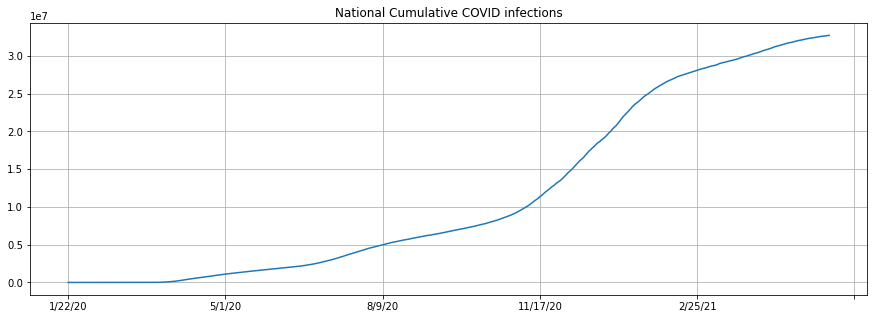

In [29]:
plt.figure(figsize = (15, 5))
ax = df_conf_ts.sum(axis='rows').plot(grid=True)
ax.set_title('National Cumulative COVID infections');

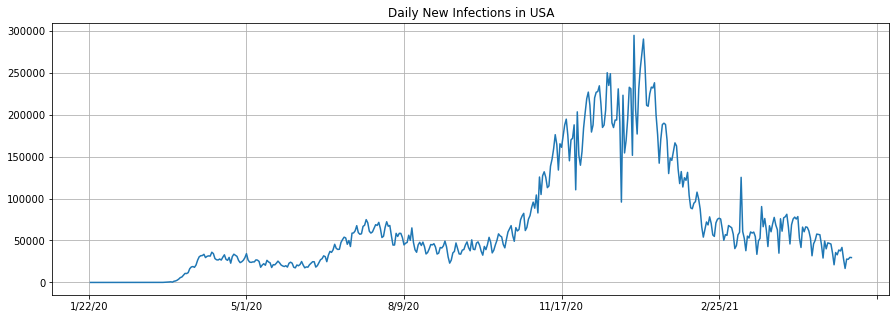

In [30]:
plt.figure(figsize = (15, 5))
ax = df_conf_ts.sum(axis='rows').diff(periods=1).plot(grid=True)
ax.set_title('Daily New Infections in USA');

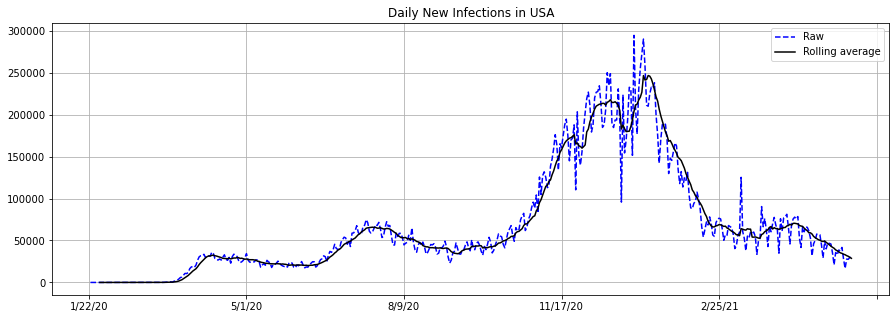

In [31]:
plt.figure(figsize = (15, 5))
ax = df_conf_ts.sum(axis='rows').diff(periods=1).plot(
    grid=True, color='b', style='--', label='Raw'
)
df_conf_ts.sum(axis='rows').diff(periods=1).rolling(window=7).mean().plot(
    grid=True, color='k', style='-', label='Rolling average', ax=ax
)
ax.set_title('Daily New Infections in USA')
_ = ax.legend()

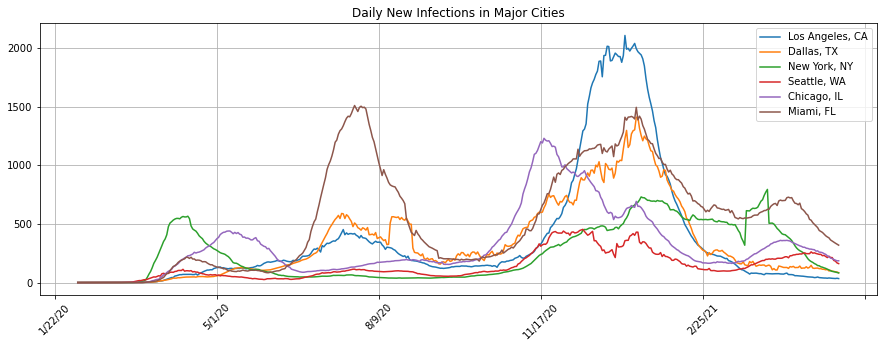

In [32]:
analysis = (
    df_conf_ts.diff(periods=14, axis='columns').T /
    df_stat.Population * 100_000
)
plt.figure(figsize = (15, 5))
ax = analysis.CA['Los Angeles'].plot(label='Los Angeles, CA')
analysis.TX['Dallas'].plot(label='Dallas, TX', ax=ax)
analysis.NY['New York'].plot(label='New York, NY', ax=ax)
analysis.WA['King'].plot(label='Seattle, WA', ax=ax)
analysis.IL['Cook'].plot(label='Chicago, IL', ax=ax)
analysis.FL['Miami-Dade'].plot(label='Miami, FL', grid=True, ax=ax)
_ = ax.legend()
_ = ax.xaxis_date()
_ = ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=45)
_ = ax.set_title('Daily New Infections in Major Cities')

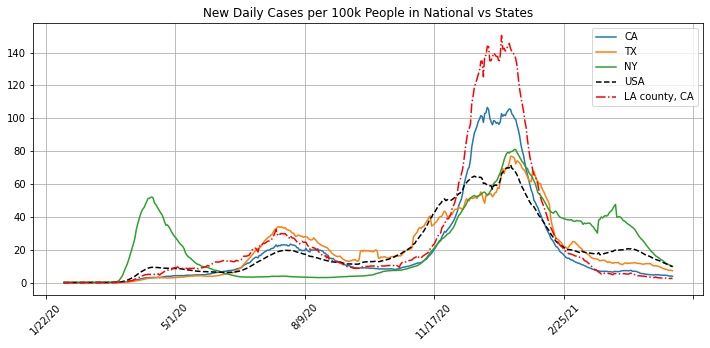

In [33]:
df = (df_conf_ts.groupby('State').sum().T / df_stat.groupby('State').sum().Population.T * 100000).diff(
    periods=1, axis=0).rolling(window=14, axis=0).mean()
plt.figure(figsize = (12, 5))
ax = df.CA.plot(label='CA')
df.TX.plot(label='TX', ax=ax)
df.NY.plot(label='NY', ax=ax)
(df_conf_ts.sum(axis=0) / df_stat.Population.sum() * 100000).diff(periods=1).rolling(window=14).mean().plot(
    label='USA', style='--', color='k', ax=ax)
(
    (df_conf_ts.T).CA['Los Angeles'] / df_stat.Population.CA['Los Angeles'] * 100000
).diff(periods=1).rolling(window=14).mean().plot(label='LA county, CA', style='-.', color='r', grid=True, ax=ax)
ax.legend()
ax.xaxis_date()
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45)
_ = ax.set_title('New Daily Cases per 100k People in National vs States')

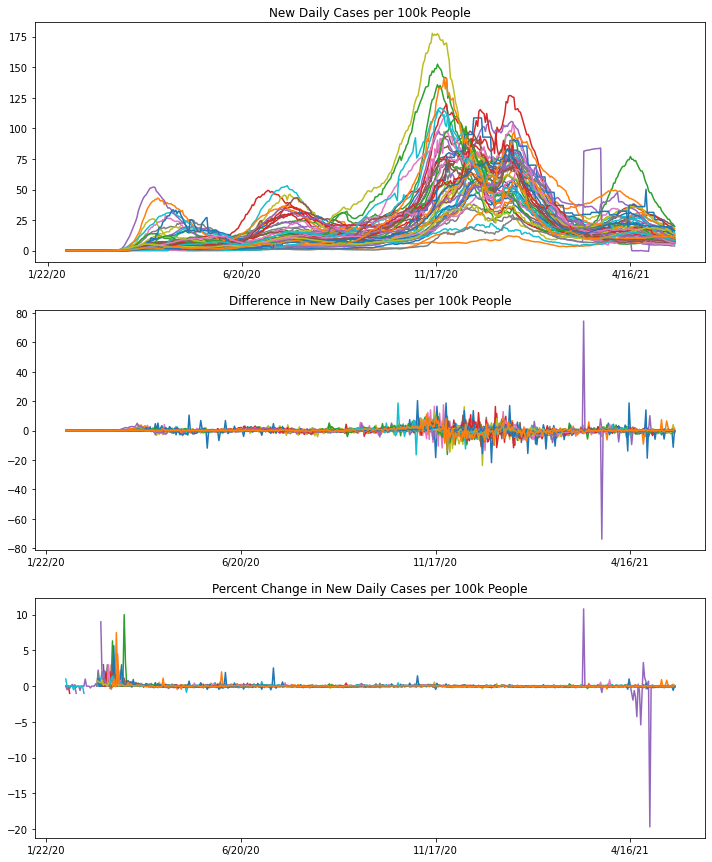

In [35]:
df = (df_conf_ts.groupby('State').sum().T / df_stat.groupby('State').sum().Population.T * 100000).diff(
    periods=1, axis=0).rolling(window=14, axis=0).mean()
fig, ax = plt.subplots(nrows=3, figsize=(12,15))
ax[0].plot(df)
ax[0].xaxis.set_major_locator(MaxNLocator(5)) 
ax[0].set_title("New Daily Cases per 100k People")
ax[1].plot(df.diff())
ax[1].xaxis.set_major_locator(MaxNLocator(5)) 
ax[1].set_title("Difference in New Daily Cases per 100k People")
ax[2].plot(df.pct_change())
ax[2].xaxis.set_major_locator(MaxNLocator(5))
ax[2].set_title("Percent Change in New Daily Cases per 100k People");

Admittedly, the subplots above look like a silly string factory exploded. I was testing to see if there was a way to clearly plot all 60 states at once and obviously, I did not succeed. However, it showed me how difficult it is to plot at a state, let alone a county, level in a traditional time-series graph. This led me to look into geopandas to see if that would be a better solution.

In [ ]:
#https://towardsdatascience.com/how-to-analyze-time-series-data-with-pandas-4dea936fe012